# User Data Analysis

In [1]:
#packages
import pandas as pd
import numpy as np
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

## Rigid body position heatmap

In [2]:
user_data = pd.read_csv('./FinalDatasets/users/pedro.txt')
start_data = user_data.loc[user_data['start'].str.contains('globalstart')]# if not it assumes it is all data BE CAREFUL HERE
startTime = 0
if start_data.shape[0] > 0:
    startTime = float(start_data.values[0][0].split()[0])
    print(startTime)
mocap_data = user_data.loc[user_data['start'].str.contains('mocap')]
mocap_data = mocap_data.start.str.split(pat=' ',expand=True)
mocap_data = mocap_data[mocap_data[0].astype(float) > startTime]

limit = 3000
step = 200
heatsize = int(limit * 2 / step)
heatmap_x_y = np.zeros( (heatsize, heatsize) , dtype=np.int64)#2.5 meters, 2500 mm x 2500 mm
heatmap_x_z = np.zeros( (heatsize, heatsize) , dtype=np.int64)
for index, row in mocap_data.iterrows():
    x = float(row[2])
    y = float(row[3])
    z = float(row[4])
    if (x >= -limit) and (x <= limit) and (y >= -limit) and (y <= limit) and (z >= -limit) and (z <= limit):
        i = int((x + limit) / step)
        j = int((y + limit) / step)
        k = int((z + limit) / step)
        heatmap_x_y[j][i] += 1
        heatmap_x_z[k][i] += 1

# plt.figure()
#data = np.array([mocap_data[2].astype(float), mocap_data[3].astype(float)])
# print(data)
#plt.imshow(heatmap)
# plt.show()
#print(mocap_data[2].astype(float).values.tolist())
#1179898.380

#sns.heatmap(heatmap)

(30, 30)


<Figure size 640x480 with 0 Axes>

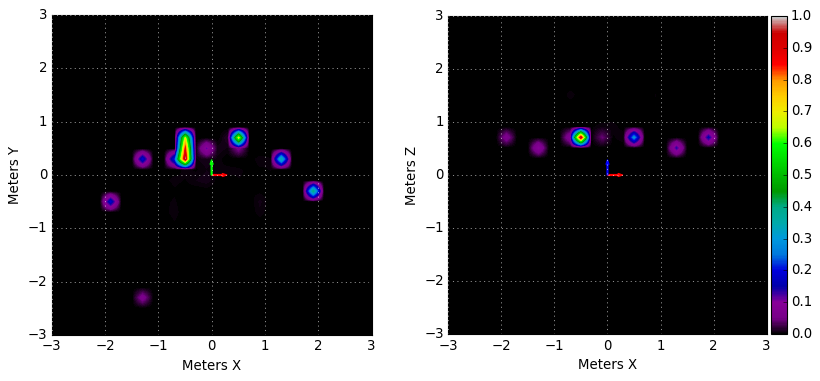

In [44]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def createIndividualHeatmap(data, limitNumber, fig, ax, hAxisName, vAxisname, hColor, vColor, cmap):
    plot = ax.imshow(NormalizeData(data), extent=[-limitNumber, limitNumber, limitNumber,- limitNumber], cmap=cmap)
    ax.invert_yaxis()
    fig.set_facecolor('white')
    ax.grid(visible = True, axis = 'y', color = 'w')
    ax.grid(visible = True, axis = 'x', color = 'w')
    ax.arrow(0, 0, arrowSize, 0, width = 0.02, color = hColor)
    ax.arrow(0, 0, 0, arrowSize, width = 0.02, color = vColor)
    ax.set_xlabel('Meters ' + hAxisName)
    ax.set_ylabel('Meters '+ vAxisname)  
    return plot


print(heatmap_x_y.shape)
plt.style.use('classic')
#plt.rcParams.update(plt.rcParamsDefault)
arrowSize = 0.2
boundary = limit / 1000 #hack -0.5

plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(12,5))
plot0 = createIndividualHeatmap(heatmap_x_y, boundary, fig, axs[0], 'X', 'Y', 'red', 'lime', 'nipy_spectral')
plot1 = createIndividualHeatmap(heatmap_x_z, boundary, fig, axs[1], 'X', 'Z', 'red', 'blue', 'nipy_spectral')
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad= 0.05)   
plt.colorbar(plot1, cax=cax)
plt.show()

plt.rcParams.update(plt.rcParamsDefault)